<a href="https://colab.research.google.com/github/linhmitless/StatColabNotebook/blob/master/MATH_2310_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MATH 2310 Lab 1

In this lab we will learn how to use Python to graph and summarize a data set.

The data set consists of values of CO$_2$ emissions (in metric tons/person) for different countries in the years between 1960 and 2014.

Your goal is to be able to make plots and compute numerical summaries that will help you describe the distribution of CO$_2$ emissions among these countries.

## 1. Import libraries

This lab will primarily use Pandas to explore our data. 

We will also use NumPy, Matplotlib, and Seaborn.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## 2. Load the data



### Method 1

Use the link below to load the data set.

In [0]:
!wget https://www.dropbox.com/s/0ht3kpgu6u5tqg0/CO2EmissionsCountries1960to2014.csv?dl=0  

--2019-01-09 21:35:58--  https://www.dropbox.com/s/0ht3kpgu6u5tqg0/CO2EmissionsCountries1960to2014.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0ht3kpgu6u5tqg0/CO2EmissionsCountries1960to2014.csv [following]
--2019-01-09 21:35:58--  https://www.dropbox.com/s/raw/0ht3kpgu6u5tqg0/CO2EmissionsCountries1960to2014.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7d04b930bd3ebf1711e3c43d2.dl.dropboxusercontent.com/cd/0/inline/AZFZuOp3FC0w-1vXGtbNJGmRMG-iMDD3Xf_UMf_X5O4d9qDZx_JF39UsT1nFu1Me_ZgzmQJ9a0iW6vu4Pt7njqmDZIyE5xcIvxHin9UtNRc4bhVHqgbDPvn0Gh7Bhj-GpAXL7VKghfe3zyOdtjELSflmoGUDfRe19Ui_HnH-_N7jpHdH8yjsHSBg6gGphoC9nnY/file [following]
--2019-01-09 21:35:58--  https://ucf7d04b930bd3ebf1711e3c43d2.dl.dropboxuserc

Now we will work with the data as a data frame in Pandas.

In [0]:
#I called the data frame df. You can use another name if you like.

df = pd.read_csv("CO2EmissionsCountries1960to2014.csv?dl=0")

### Method 2

You should have a csv file called CO2EmissionsCountries1960to2014.csv saved somewhere where you can access the file.

To load the file, run the cell below and then use the "Choose Files" tab to select the CO2EmissionsCountries1960to2014.csv file.

In [0]:
from google.colab import files
uploaded = files.upload()

Now we will work with the data as a data frame in Pandas.

In [0]:
#I called the data frame df. You can use another name if you like.

df = pd.read_csv("CO2EmissionsCountries1960to2014.csv")

FileNotFoundError: ignored

## 3. Look at the raw data

It is often useful to look at the head of the data frame. This will show you the first five values from each column of the data frame. This helps to give you a sense of what variables are present in the data set and what kinds of values they take on.

In [0]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,27.200708,26.948260,27.895574,26.230847,25.915833,24.670529,24.505835,13.155542,8.351294,8.408363
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,...,0.052948,0.063728,0.085418,0.154101,0.241723,0.293837,0.412017,0.350371,0.315602,0.299445
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,...,0.979740,1.098884,1.197844,1.181527,1.232495,1.243406,1.252789,1.330843,1.254617,1.291328
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,7.299872,6.746219,6.519466,6.427887,6.121652,6.122595,5.867130,5.916597,5.900753,5.832170


### **Question 3.1**. What are the variables in your data set?

The columns of interest in the data set are the Country Name, Country Code (which is redundant with Country Name), and the CO$_2$ emissions for many years. The indicator name tells you what is measured in each year.

### **Question 3.2**. For each variable, determine whether it is numerical or categorical.


CO$_2$ emission is a number and it makes sense to do arithmetic with the values, so it is a numerical variable. 

### **Question 3.3**. Look at the raw CO$_2$ data for all countries in 2010. Can you tell from looking at the table of data values what the shape of the CO$_2$ emission distribution looks like?


In [0]:
#To look at the entire data set, we can type the name of our data frame.
#To look at one column, type df['Name of the column']

df['2010']

0      24.670529
1       0.293837
2       1.243406
3       1.578574
4       6.122595
5      19.443690
6       4.558500
7       1.465622
8            NaN
9       5.539568
10     17.740845
11      8.071132
12      3.388226
13      0.024260
14     10.171465
15      0.553283
16      0.125717
17      0.393937
18      5.964900
19     23.585481
20      4.583343
21      5.716135
22      6.642697
23      1.676106
24      9.347122
25      1.532871
26      2.132938
27      5.285997
28     21.105946
29      0.670263
         ...    
188     6.152288
189     0.043496
190     0.406006
191     4.194782
192     0.333031
193    11.261485
194     0.211509
195     1.126823
196    36.092933
197     2.599658
198     4.120215
199     0.696420
200     0.154162
201     0.115583
202     6.641350
203     1.893043
204    17.442166
205     3.647049
206     2.012716
207     6.513377
208     6.330774
209          NaN
210     1.613360
211     0.512118
212     1.004361
213          NaN
214     0.992602
215     9.1906

It is difficult to understand the shape of the distribution just by looking at the data table. There are clearly a few large values and many smaller values, but the exact shape of the distribution is not easy to visualize. 

We can do better using graphs to visualize the distribution.

## 4. Graphing the distribution

### **Question 4.1**. Why is a histogram an appropriate graph to use to visualize the CO$_2$ distribution?

CO$_2$ emission is a continous numerical variable and our data set is not small (n = 218), so a histogram is an appropriate graph to use.

### **Question 4.2**. Construct a histogram of the CO$_2$ emission data from 2010 using 20 bins and describe the distribution.

Your histogram should have the axes labeled.

Be sure to describe all relevant features of the histogram.

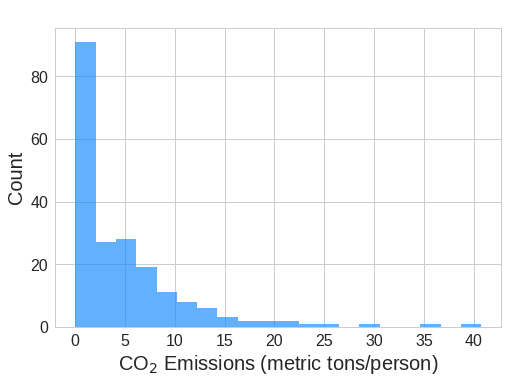

In [0]:
df.hist(column = '2010',alpha = 0.7, color = 'dodgerblue',bins = 20)

#You can specify the bin edges
#df.hist(column = '2010',alpha = 0.7, color = 'dodgerblue',bins = np.arange(0,43,2))

#Label the axes
plt.ylabel('Count',fontsize = 20)
plt.xlabel('CO$_2$ Emissions (metric tons/person)',fontsize = 20)
plt.title(' ',fontsize = 20)

#Set tick label sizes
plt.tick_params(labelsize = 16)

plt.show()

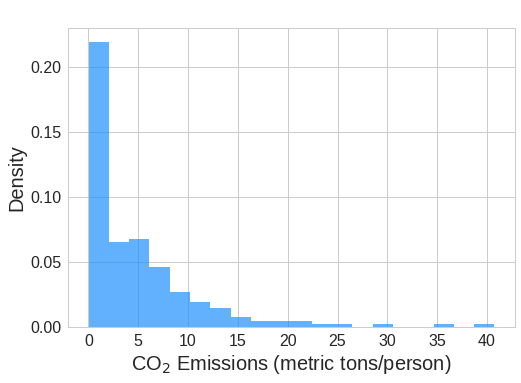

In [0]:
#Use seaborn to plot on a density scale
sns.distplot(df['2010'].dropna(how='all'),bins = 20,kde_kws={"color": "k", "lw": 0, 'cut': 0},hist_kws={"linewidth": 3,"alpha": 0.7, "color": "dodgerblue"})

#Label the axes
plt.ylabel('Density',fontsize = 20)
plt.xlabel('CO$_2$ Emissions (metric tons/person)',fontsize = 20)
plt.title(' ',fontsize = 20)

#Set tick label sizes
plt.tick_params(labelsize = 16)

plt.show()

The histogram is skewed to the right, or positively skewed. This is consistent with our initial impression that there are many small values and a few large values of emissions.

There are several countries at the upper end of the range of emissions that are potential outliers.

The small bump around 5 metric tons/person might lead you to suggest that the distribution is bimodal, but the peak is small enough that it is reasonably called unimodal.

### **Question 4.3**. Construct histograms of the CO$_2$ emission data in 2010 with different numbers of bins. Does your impression of the distribution change with different numbers of bins?

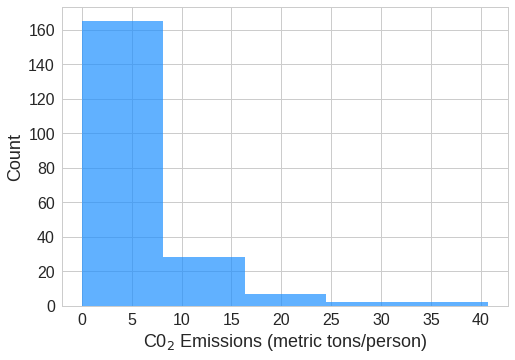

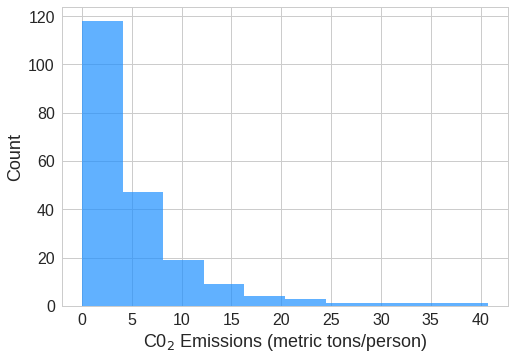

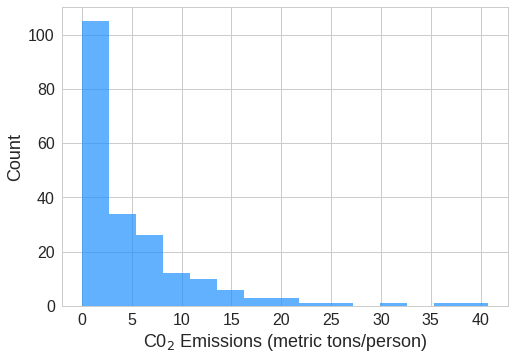

In [0]:
#Use 5 bins
df.hist(column = '2010',alpha = 0.7, color = 'dodgerblue',bins = 5)
plt.xlabel('C0$_2$ Emissions (metric tons/person)',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('')
plt.tick_params(labelsize = 16)


#Use 10 bins
df.hist(column = '2010',alpha = 0.7, color = 'dodgerblue',bins = 10)
plt.xlabel('C0$_2$ Emissions (metric tons/person)',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('')
plt.tick_params(labelsize = 16)


#Use 15 bins
df.hist(column = '2010',alpha = 0.7, color = 'dodgerblue',bins = 15)
plt.xlabel('C0$_2$ Emissions (metric tons/person)',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('')
plt.tick_params(labelsize = 16)

plt.show()

The distribution looks similar using histograms with 5, 10, and 15 bins. The distribution is skewed to the right and there are several potential outliers.

## 5. Numerical summaries

### **Question 5.1**. Review the definitions of the sample mean, median, standard deviation, interquartile range, and 5-number summary of a data set.

Suppose we have a data set consisting of $n$ values $x_1, x_2, \ldots, x_n$.

**Measure of center**

The sample mean is $\displaystyle \bar{x} = \frac{1}{n}\sum_{i = 1}^n x_i$.

The sample median $\tilde{x}$ is the $50^{th}$ percentile. If $n$ is odd, then $\tilde{x}$ is the middle value after the values are ordered. If $n$ is even, then $\tilde{x}$ is the average of the two middle values after the values are ordered.

**Measures of spread**

The sample standard deviation is $\displaystyle s = \sqrt{\frac{1}{n - 1}\sum_{i = 1}^n (x_i - \bar{x})^2}$.

The first quartile is the $25{th}$ percentile and the third quartile is the $75{th}$ percentile.  The interquartile range is the difference between the $75{th}$ percentile and $25{th}$ percentile.

**5-number summary**

The 5-number summary consists of the 5 numbers: minimum, first quartile, median, third quartile, maximum.


### **Question 5.2**. Use the .describe() function to compute the sample mean, median, standard deviation, interquartile range, and 5-number summary of the CO$_2$ data set.

df.describe() will give you the summaries for all numerical variables in the data set.

df['1960'].describe() will give you the summaries for just the 1960 column.

df['1960'].describe()['mean'] will give you the mean for just the 1960 column.

In [0]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,152.000000,153.000000,155.000000,156.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,...,202.000000,203.000000,204.000000,204.000000,204.000000,204.000000,204.000000,206.000000,206.000000,204.000000
mean,2.070679,2.216598,2.316058,2.947975,3.112612,3.239856,3.236653,3.304254,3.519472,4.251205,...,4.934908,5.007090,5.033495,5.032251,4.807773,4.921011,4.859876,5.030037,4.933972,4.973695
std,4.457112,4.683338,5.062040,9.341651,9.352750,9.583044,8.841837,7.918706,7.812391,10.892139,...,6.836770,7.006817,6.817247,6.585042,6.253323,6.283470,6.205093,6.629599,6.255262,6.540012
min,0.008017,0.007892,0.008475,0.009383,0.011598,0.011914,0.013258,0.011800,-0.020100,0.016116,...,0.020747,0.024366,0.023555,0.023219,0.022462,0.024260,0.026762,0.030297,0.030176,0.044485
25%,0.144445,0.150782,0.171684,0.171290,0.183518,0.203201,0.211852,0.209988,0.239212,0.250147,...,0.711748,0.685498,0.686304,0.632640,0.643619,0.666762,0.722237,0.758089,0.785358,0.868873
50%,0.480395,0.497232,0.547992,0.545401,0.659313,0.657545,0.704057,0.699404,0.827052,0.823109,...,2.273938,2.426221,2.355854,2.534459,2.659933,2.594963,2.632902,2.637775,2.771120,2.764984
75%,1.790830,2.158328,2.169161,1.946426,2.140375,2.375210,3.099937,4.045505,4.174556,4.160206,...,7.109667,7.074235,6.929390,7.029875,6.311029,6.580727,6.626816,6.508001,6.319731,6.218945
max,36.685183,36.583778,42.241998,99.463000,92.859488,85.458585,78.627123,77.508639,75.975333,100.697669,...,58.918733,62.823536,53.190986,46.672138,43.514477,40.742018,41.205645,44.617929,37.780085,45.423240


In [0]:
df['2010'].describe()

count    204.000000
mean       4.921011
std        6.283470
min        0.024260
25%        0.666762
50%        2.594963
75%        6.580727
max       40.742018
Name: 2010, dtype: float64

In [0]:
#Interquartile range
Q3 = df['2010'].describe()['75%']
Q1 = df['2010'].describe()['25%']
IQR = Q3 - Q1

print(IQR)

5.913965012999999


### **Question 5.3**. One way to define outliers are as points that that are more than 1.5 $\times$ IQR above the third quartile or below the first quartile. Does the CO$_2$ data set from 2010 contain outliers? If so, which countries are outliers?

In [0]:
#First find the bounds beyond which we have outliers

Upper_bound = Q3 + 1.5*IQR
Lower_bound = Q1 - 1.5*IQR

print(Lower_bound, Upper_bound)

-8.204185106 15.451674945999999


Note that the lower bound is negative. Since the values of the CO$_2$ emission are all positive, we know that we won't have any outliers on the low end.

In [0]:
#Find if any values are beyond the upper bound

df[['Country Name','2010']][df['2010'] > Upper_bound]

,Country Name,2010
0,Aruba,24.670529
5,United Arab Emirates,19.443690
10,Australia,17.740845
19,Bahrain,23.585481
28,Brunei Darussalam,21.105946
32,Canada,15.723167
106,Kuwait,29.894151
116,Luxembourg,21.635136
149,Oman,15.590531
163,Qatar,40.742018


In [0]:
np.shape(df[['Country Name','2010']][df['2010'] > Upper_bound])

(13, 2)

We have 13 outliers, all of which emit the most CO$_2$. 

Another way to describe where a point falls in a distribution is using the z-score. The z-score of a value $x$ is defined as $\displaystyle z = \frac{x - \bar{x}}{s}$.

### **Question 5.4**. What does it tell you about where $x$ lies in the distribution if its z-score is positive or negative?

If the z-score is positive, then $x$ is greater than the mean.

If the z-score is negative, then $x$ is less than the mean.

### **Question 5.5**. For a distribution that follows the bell-shaped Normal curve, we have a 68 − 95 − 99.7% rule that says that 68% of the distribution will be within 1 standard deviation of the mean, 95% of the distribution will be within 2 standard deviations of the mean, and 99.7% of the distribution will be within 3 standard deviations of the mean. If we try this rule with the CO$_2$ emission data in 2010 to find the middle 95% of the data, do we get reasonable results?

In [0]:
df['2010'].describe()

count    204.000000
mean       4.921011
std        6.283470
min        0.024260
25%        0.666762
50%        2.594963
75%        6.580727
max       40.742018
Name: 2010, dtype: float64

In [0]:
U = df['2010'].describe()['mean'] + 2*df['2010'].describe()['std']

L = df['2010'].describe()['mean'] - 2*df['2010'].describe()['std']

print(L, U)

-7.645929654035815 17.487951222437776


From above we know that $\bar{x} = 4.92$ and $s$ = 6.28. So, a Normal distribution with this mean and standard deviation would have 95% of its values between 

$\bar{x} - 2s = -7.65$

and 

$\bar{x} + 2s = 17.49$

This is not particularly reasonable here because we know that CO$_2$ emissions are not negative. We also know from our histogram that the distribution is skewed, not symmetric like the Normal bell curve.


## 6. Graphing the distribution part 2

Another useful graph for numerical variables is the boxplot. The boxplot is a graph of the 5-number summary. A standard boxplot has a box that extends from the first quartile to the third quartile, with a line in the middle for the median. Lines are drawn from the first quartile to the minumum value and from the third quartile to the maximum value.

### **Question 6.1**. Create a boxplot of the CO$_2$ emissions in 2010 using the sns.boxplot() function.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


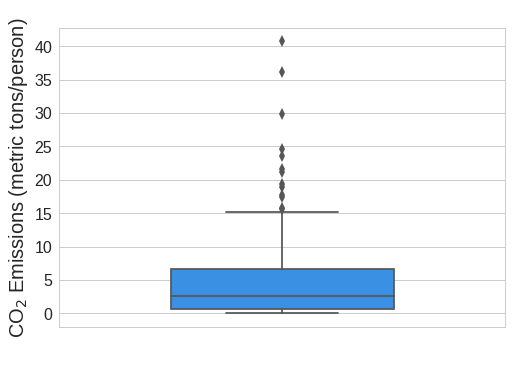

In [0]:
sns.boxplot(data=df['2010'].dropna(how='all'),color = 'dodgerblue',width = 0.5,fliersize = 8)

#Label the axes
plt.xlabel(' ',fontsize = 20)
plt.ylabel('CO$_2$ Emissions (metric tons/person)',fontsize = 20)
plt.title(' ',fontsize = 20)
plt.tick_params(labelsize = 16)
plt.xticks([0],' ')

plt.show()

### **Question 6.2**. Compare the boxplot and histogram. Do they provide the same picture of the distribution? Does one provide more detail than the other?

The boxplot and the histogram provide similar pictures, but the boxplot is very limited compared to the histogram.

It is easier to see the skewness of the distribution in the histogram.

Bimodal or multimodal distributions are not easily detected using the boxplot.

Boxplots are useful for make a simple comparison of many distributions, but we can create similar graphs that provide more information. An example is a violin plot.

### **Question 6.3**. Add a swarm plot on top of the boxplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


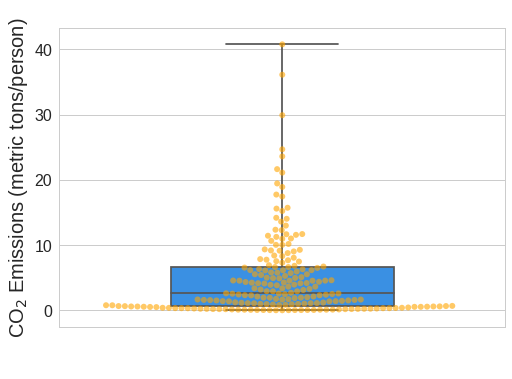

In [0]:
#Boxplot
sns.boxplot(data=df['2010'],color = 'dodgerblue',whis=np.inf,width = 0.5)

#Swarm plot
sns.swarmplot(data=df['2010'],color = 'orange',size = 6,alpha = 0.6)

#Label the axes
plt.xlabel(' ',fontsize = 20)
plt.ylabel('CO$_2$ Emissions (metric tons/person)',fontsize = 20)
plt.title(' ',fontsize = 20)
plt.tick_params(labelsize = 16)
plt.xticks([0],' ')

plt.show()

## 7. Compare the CO$_2$ distributions in 1960 and 2010.

### Question 7.1. Make comparative boxplots of the CO$_2$ emission distributions in 1960 and 2010. Discuss the differences in the distributions.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


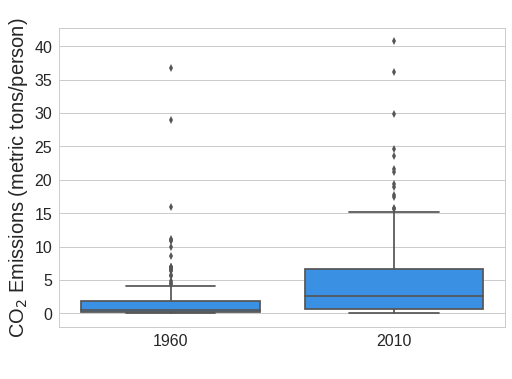

In [0]:
sns.boxplot(data=df[['1960','2010']],color = 'dodgerblue')

plt.xlabel(' ',fontsize = 20)
plt.ylabel('CO$_2$ Emissions (metric tons/person)',fontsize = 20)
plt.title(' ',fontsize = 20)

plt.tick_params(labelsize = 16)

plt.show()

We can also add swarm plots on top of the boxplots.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


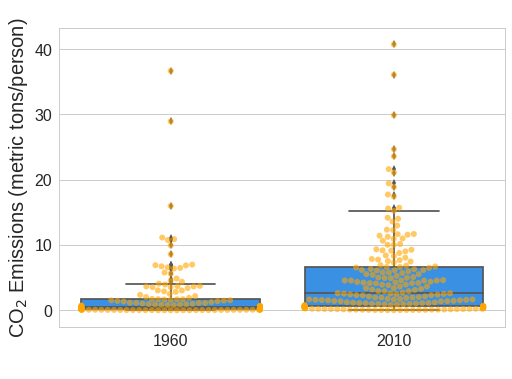

In [0]:
#Boxplot
sns.boxplot(data=df[['1960','2010']],color = 'dodgerblue')

#Swarm plot
sns.swarmplot(data=df[['1960','2010']],color = 'orange',size = 6,alpha = 0.6)

#Label the axes
plt.xlabel(' ',fontsize = 20)
plt.ylabel('CO$_2$ Emissions (metric tons/person)',fontsize = 20)
plt.title(' ',fontsize = 20)
plt.tick_params(labelsize = 16)

plt.show()

CO$_2$ emissions in metric tons/person have increased quite a lot between 1960 and 2010.

As we see below, the mean has more than doubled and the median is more than 5 times what it was in 1960.

In [0]:
df[['1960','2010']].describe()

,1960,2010
count,152.000000,204.000000
mean,2.070679,4.921011
std,4.457112,6.283470
min,0.008017,0.024260
25%,0.144445,0.666762
50%,0.480395,2.594963
75%,1.790830,6.580727
max,36.685183,40.742018
